In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#the matplotlib inline allows you to display all graphs in Jupyter Notebooks
#the matplotlib.pyplot import allows you to manipulate plot, can use interface to generate plot

In [2]:
#tract is the number of the tract 
#pre1950 represents the percent of homes in each census tract that were built on or before 1950
house_percent_data = pd.read_csv("CSVs/pre1950housing.csv")
#house_percent_data

In [3]:
house_percent_data['TRACT'].dtypes
house_percent_data.rename({'TRACT': 'Census Tracts'}, axis=1, inplace=True)
house_percent_data

,Census Tracts,Pre1950
0,10300,0.658477
1,20100,0.321088
2,20300,0.724907
3,30500,0.324117
4,40200,0.463549
...,...,...
388,980000,0.353982
389,980100,0.000000
390,980700,0.619048
391,981100,0.000000


In [4]:
#neighborhoods corresponding the tract numbers"
tract = pd.read_csv("CSVs/Pittsburgh_Census_Tracts_2010.csv")
tract.head()

,Neighborhood,Census Tracts
0,Allegheny Center,562700
1,Allegheny West,562700
2,Allentown,180300
3,Arlington,561600
4,Arlington Heights,561600


In [5]:
tract['Neighborhood'] = tract['Neighborhood'].astype('string') 
#tract['Neighborhood'].dtypes
tract['Census Tracts'] = tract['Census Tracts'].astype('string')
#tract['Census Tracts'].dtypes

In [6]:
tract['Census Tracts'] = tract['Census Tracts'].str.split(', ')
tract_data =tract.explode('Census Tracts', ignore_index=True)
tract_data['Census Tracts'] = pd.to_numeric(tract_data['Census Tracts'])
tract_data['Census Tracts'].dtypes
tract_data.head(50)

,Neighborhood,Census Tracts
0,Allegheny Center,562700
1,Allegheny West,562700
2,Allentown,180300
3,Arlington,561600
4,Arlington Heights,561600
5,Banksville,202300
6,Bedford Dwellings,50900
7,Beechview,191600
8,Beltzhoover,562400
9,Bloomfield,80200


In [7]:
old_house_data=pd.merge(house_percent_data, tract_data, on='Census Tracts')
old_house_data.head()

,Census Tracts,Pre1950,Neighborhood
0,10300,0.658477,Bluff
1,20100,0.321088,Golden Triangle/Civic Arena
2,20300,0.724907,Strip District
3,30500,0.324117,Crawford-Roberts
4,40200,0.463549,Terrace Village


# plotting

<AxesSubplot:>

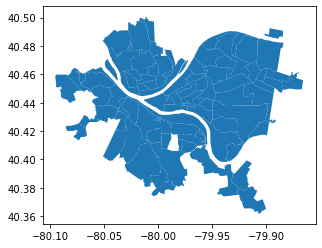

In [16]:

# set the filepath and load
fp = "Neighborhoods/Neighborhoods_.shp"
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
# crs for longitude and latitude
crs = "EPSG:4326"

# convert coordinate system to longitude and latitude
map_df = map_df.to_crs(crs)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()
#plotting the map of the shape file preview of the maps without data in it
map_df.plot()


In [17]:
#selecting the columns required
old_house_data = old_house_data[['Neighborhood','Pre1950']]
old_house_data

,Neighborhood,Pre1950
0,Bluff,0.658477
1,Golden Triangle/Civic Arena,0.321088
2,Strip District,0.724907
3,Crawford-Roberts,0.324117
4,Terrace Village,0.463549
...,...,...
133,East Allegheny,0.717496
134,North Shore,0.717496
135,Lincoln-Lemington-Belmar,0.353982
136,South Shore,0.619048


In [18]:
old_house_data.describe()

,Pre1950
count,138.000000
mean,0.617268
std,0.185341
min,0.000000
25%,0.498227
50%,0.657483
75%,0.746364
max,0.915811


<AxesSubplot:>

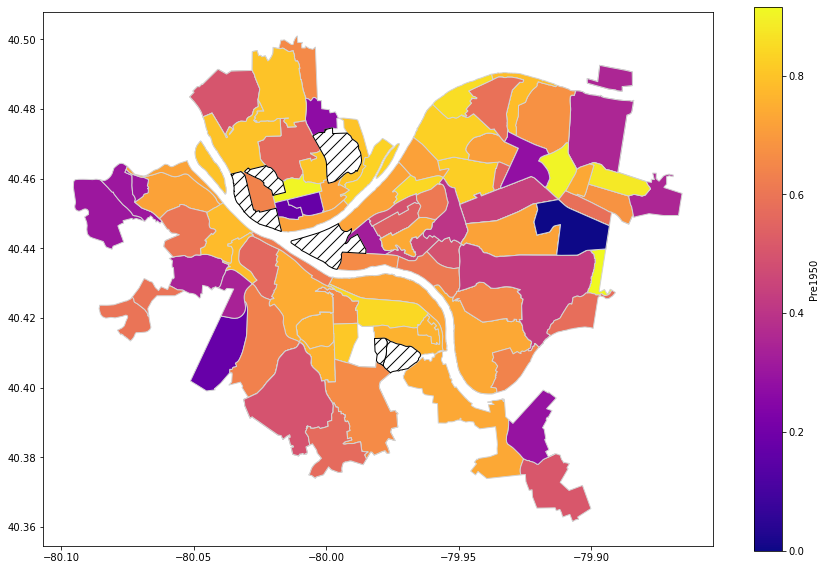

In [21]:
# merge the neighborhoods file for the map with crime rate data
old_house_data_map = map_df.merge(old_house_data, how = "left", left_on = "hood", 
                                right_on = "Neighborhood") 
#shape file MISSING MOUNT OLIVER BOROUGH MENTION THIS

# display map with my parameters
old_house_data_map.plot(column="Pre1950",
               cmap = "plasma",
               edgecolor = "lightgrey", 
               legend = True,
               legend_kwds = {"label" : "Pre1950"},
               missing_kwds = {
                         "color" : "white",
                         "edgecolor" : "black",
                         "hatch" : "//"},
               figsize = (15, 10)
              )

In [12]:
#the data on percent venous confirmed elevated blood lead levels (EBLLs)(≥5 μg/dL)
#for Allegheny County children less than 6 years of ageby assigned geography for 2015-2019
lead_data = pd.read_csv("CSVs/Blood_Lead_Level_Rates.csv")


In [13]:
lead_data.rename({'percentEBLL2015': 'percent_lead_levels','note2015': 'note' }, axis=1, inplace=True)
lead_data=lead_data.drop(['percentEBLL2016', 'percentEBLL2017', 'percentEBLL2018', 'percentEBLL2019','percentEBLL15_19','note2016', 'note2017', 'note2018', 'note2019','note15_19'], axis=1)
lead_data

,SchoolDistrict,percent_lead_levels,note
0,Allegheny Valley,0.00,"Unstable percent, interpret with caution"
1,Avonworth,0.72,"Unstable percent, interpret with caution"
2,Baldwin-Whitehall,0.91,"Unstable percent, interpret with caution"
3,Bethel Park,0.00,"Unstable percent, interpret with caution"
4,Brentwood Borough,1.60,"Unstable percent, interpret with caution"
5,Carlynton,0.66,"Unstable percent, interpret with caution"
6,Chartiers Valley,1.53,"Unstable percent, interpret with caution"
7,City of Pittsburgh,5.55,NaN
8,Clairton City,2.73,"Unstable percent, interpret with caution"
9,Cornell,1.67,"Unstable percent, interpret with caution"


In [14]:
# drop NAN
nan_df = lead_data[lead_data.isna().any(axis=1)]
display(nan_df.head())

lead_data = lead_data.dropna(how='any') 
lead_data

,SchoolDistrict,percent_lead_levels,note
7,City of Pittsburgh,5.55,NaN
14,Fort Cherry,NaN,Censored
20,McKeesport Area,6.75,NaN
26,Northgate,9.66,NaN
28,Penn-Trafford,NaN,Censored


,SchoolDistrict,percent_lead_levels,note
0,Allegheny Valley,0.00,"Unstable percent, interpret with caution"
1,Avonworth,0.72,"Unstable percent, interpret with caution"
2,Baldwin-Whitehall,0.91,"Unstable percent, interpret with caution"
3,Bethel Park,0.00,"Unstable percent, interpret with caution"
4,Brentwood Borough,1.60,"Unstable percent, interpret with caution"
5,Carlynton,0.66,"Unstable percent, interpret with caution"
6,Chartiers Valley,1.53,"Unstable percent, interpret with caution"
8,Clairton City,2.73,"Unstable percent, interpret with caution"
9,Cornell,1.67,"Unstable percent, interpret with caution"
10,Deer Lakes,0.00,"Unstable percent, interpret with caution"


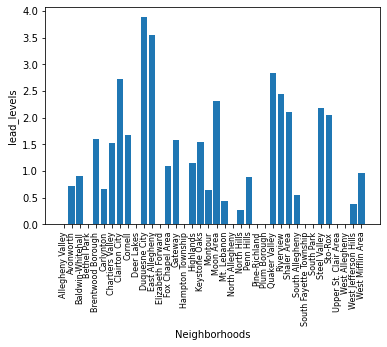

In [15]:
keys = [hood for hood, df in lead_data.groupby(['SchoolDistrict'])]

plt.bar(keys,lead_data.groupby(['SchoolDistrict']).sum()['percent_lead_levels'])
plt.ylabel('lead_levels')
plt.xlabel('Neighborhoods')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()